In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

Device configuration

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Hyper-parameters 

In [3]:
num_epochs = 5
batch_size = 4
learning_rate = 0.001

dataset has PILImage images of range [0, 1]. <br>
We transform them to Tensors of normalized range [-1, 1]

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|████████████████████████████████████████████████████████████████| 170498071/170498071 [06:16<00:00, 453120.20it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


In [6]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified


In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

In [8]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

In [9]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

get some random training images

In [11]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

show images

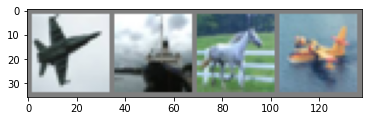

In [12]:
imshow(torchvision.utils.make_grid(images))

In [13]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

In [14]:
model = ConvNet().to(device)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [2000/12500], Loss: 2.2685
Epoch [1/5], Step [4000/12500], Loss: 2.2867
Epoch [1/5], Step [6000/12500], Loss: 2.3034
Epoch [1/5], Step [8000/12500], Loss: 2.2716
Epoch [1/5], Step [10000/12500], Loss: 2.2716
Epoch [1/5], Step [12000/12500], Loss: 2.3873
Epoch [2/5], Step [2000/12500], Loss: 2.4181
Epoch [2/5], Step [4000/12500], Loss: 1.7284
Epoch [2/5], Step [6000/12500], Loss: 2.6104
Epoch [2/5], Step [8000/12500], Loss: 1.4883
Epoch [2/5], Step [10000/12500], Loss: 1.5134
Epoch [2/5], Step [12000/12500], Loss: 1.3902
Epoch [3/5], Step [2000/12500], Loss: 1.4499
Epoch [3/5], Step [4000/12500], Loss: 1.8079
Epoch [3/5], Step [6000/12500], Loss: 2.0323
Epoch [3/5], Step [8000/12500], Loss: 2.3999
Epoch [3/5], Step [10000/12500], Loss: 2.4651
Epoch [3/5], Step [12000/12500], Loss: 0.8812
Epoch [4/5], Step [2000/12500], Loss: 1.2918
Epoch [4/5], Step [4000/12500], Loss: 1.4850
Epoch [4/5], Step [6000/12500], Loss: 0.7901
Epoch [4/5], Step [8000/12500], Loss: 2.2893
Epoc

In [17]:
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Finished Training
